In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.tree import plot_tree

In [155]:
data=pd.read_csv("Company_Data.csv")

In [156]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [157]:
from sklearn import preprocessing

In [158]:
le = preprocessing.LabelEncoder()

In [159]:
data["ShelveLoc"]=le.fit_transform(data["ShelveLoc"])
data["Urban"]=le.fit_transform(data["Urban"])
data["US"]=le.fit_transform(data["US"])

In [160]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


In [162]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [163]:
data1=data.assign(Sale=pd.cut(data['Sales'],bins=[-1,5,11,17],labels=['Low', 'Medium', 'High']))
data1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
0,9.50,138,73,11,276,120,0,42,17,1,1,Medium
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,Medium
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High
396,6.14,139,23,3,37,120,2,55,11,0,1,Medium
397,7.41,162,26,12,368,159,2,40,18,1,1,Medium
398,5.94,100,79,7,284,95,0,50,12,1,1,Medium


In [164]:
data1.Sale.unique()

['Medium', 'High', 'Low']
Categories (3, object): ['Low' < 'Medium' < 'High']

In [165]:
data1.Sale.value_counts()

Medium    274
Low        77
High       49
Name: Sale, dtype: int64

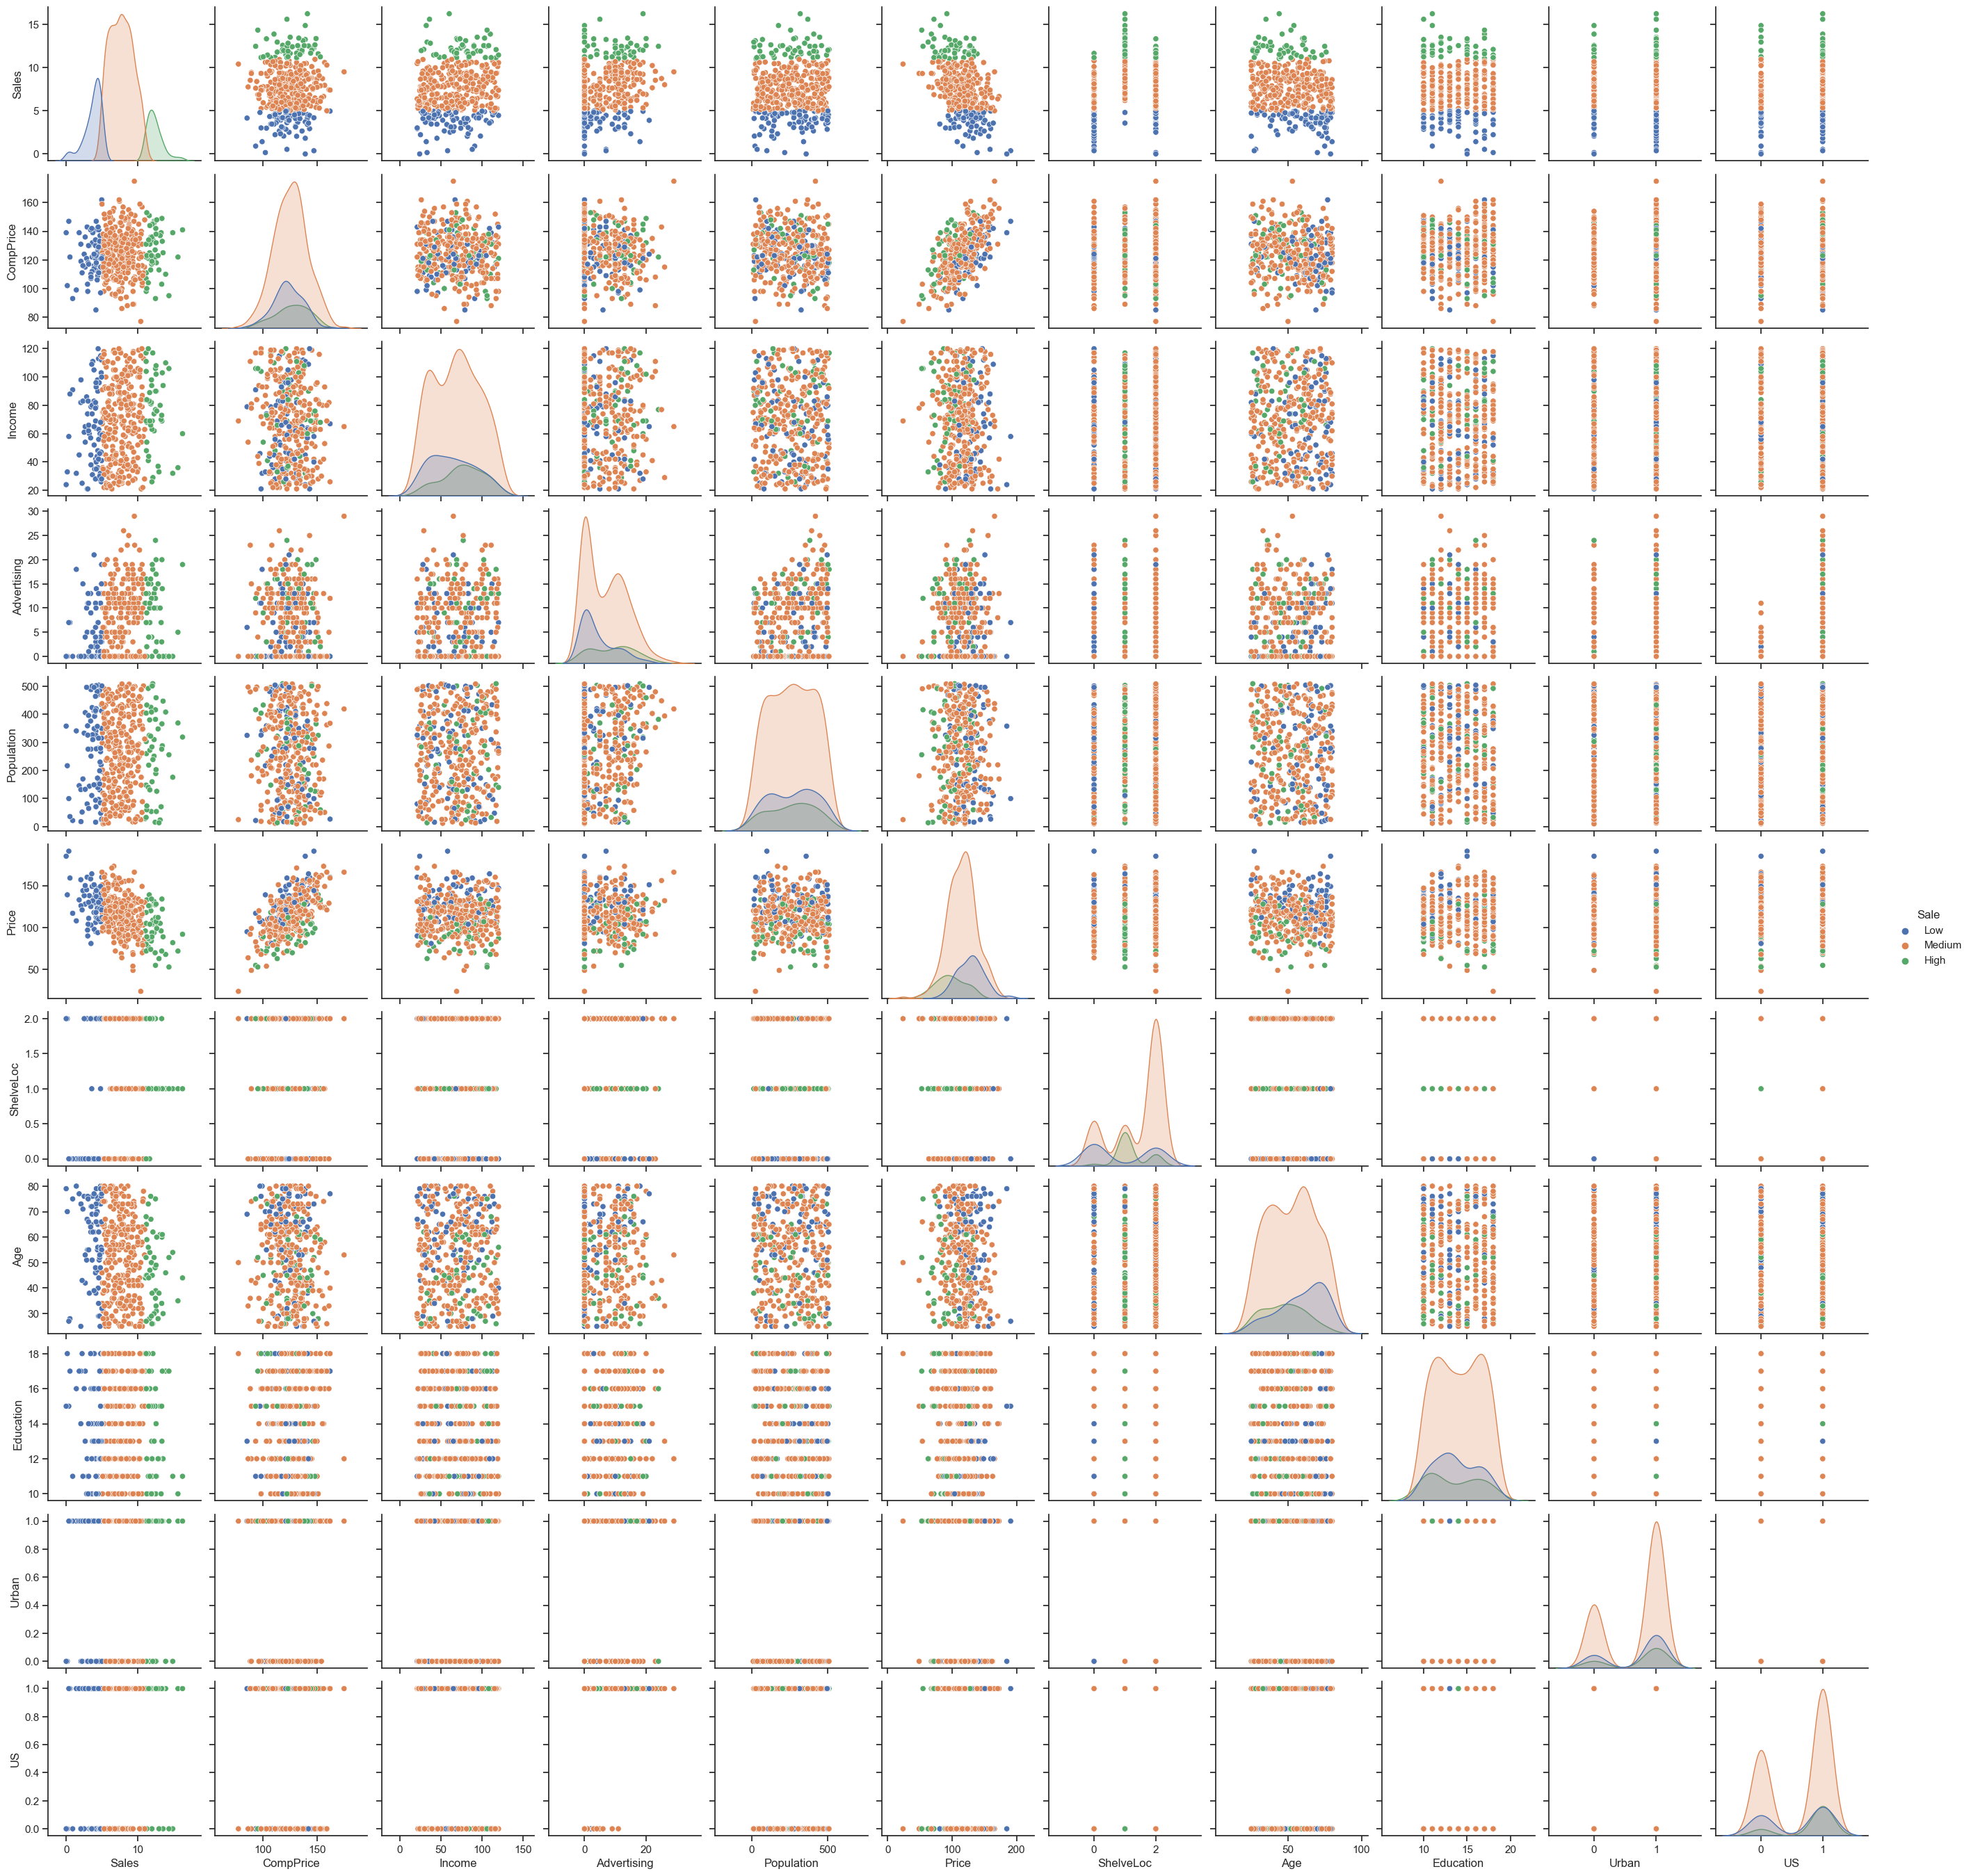

In [166]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=data1, hue = "Sale")

<Axes: >

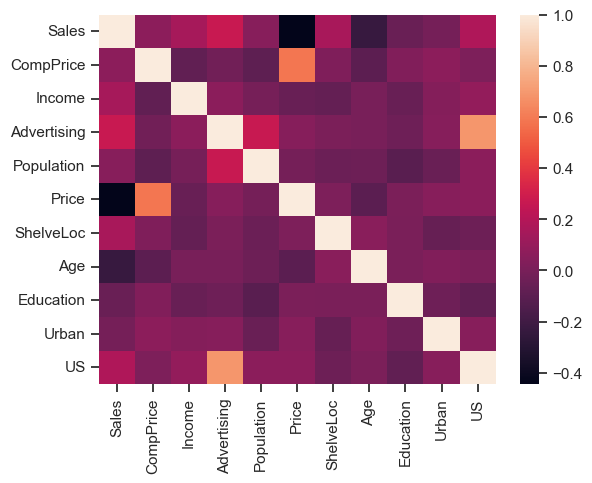

In [167]:
# correlation matrix
sns.heatmap(data.corr())

In [168]:
target = pd.DataFrame.astype(data1['Sale'], dtype="object")
df1 = data.copy()
df1 = df1.drop('Sales', axis =1)

In [169]:
# Defining the attributes
X = df1
target = target.fillna('').apply(str)
target

0      Medium
1        High
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398    Medium
399    Medium
Name: Sale, Length: 400, dtype: object

In [170]:
#label encoding
target = le.fit_transform(target)
target

array([2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 1, 2, 2, 2,

In [171]:
colnames = list(data1.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'Sale']

In [172]:
y = target

In [173]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state =25)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (320, 10)
Testing split input-  (80, 10)


In [174]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

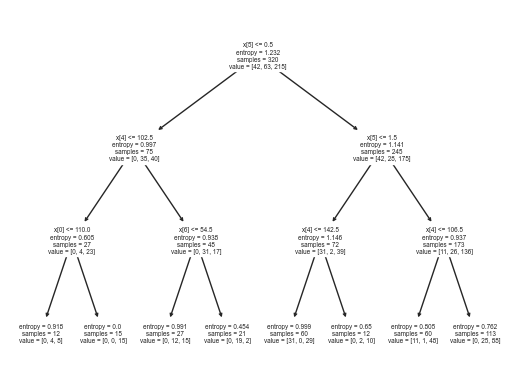

In [175]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(model);

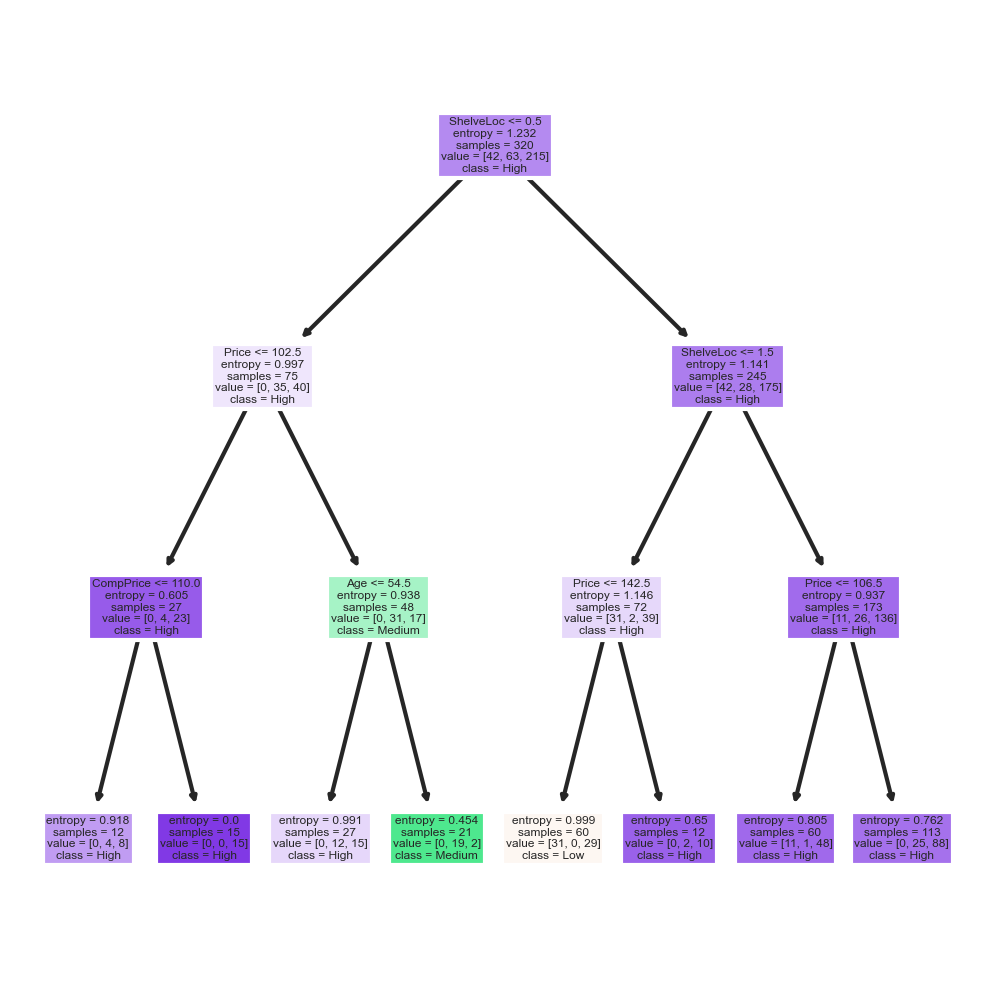

In [178]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [180]:
text = tree.export_text(model,max_depth=3)  
print(text) 

|--- feature_5 <= 0.50
|   |--- feature_4 <= 102.50
|   |   |--- feature_0 <= 110.00
|   |   |   |--- class: 2
|   |   |--- feature_0 >  110.00
|   |   |   |--- class: 2
|   |--- feature_4 >  102.50
|   |   |--- feature_6 <= 54.50
|   |   |   |--- class: 2
|   |   |--- feature_6 >  54.50
|   |   |   |--- class: 1
|--- feature_5 >  0.50
|   |--- feature_5 <= 1.50
|   |   |--- feature_4 <= 142.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  142.50
|   |   |   |--- class: 2
|   |--- feature_5 >  1.50
|   |   |--- feature_4 <= 106.50
|   |   |   |--- class: 2
|   |   |--- feature_4 >  106.50
|   |   |   |--- class: 2



In [179]:
#Find the accuracy
model.score(X_test,y_test)

0.625

In [181]:
model.feature_importances_ 

array([0.0367906 , 0.        , 0.        , 0.        , 0.38567795,
       0.5172049 , 0.06032655, 0.        , 0.        , 0.        ])

In [182]:
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

ShelveLoc      0.517205
Price          0.385678
Age            0.060327
CompPrice      0.036791
Income         0.000000
Advertising    0.000000
Population     0.000000
Education      0.000000
Urban          0.000000
US             0.000000
dtype: float64

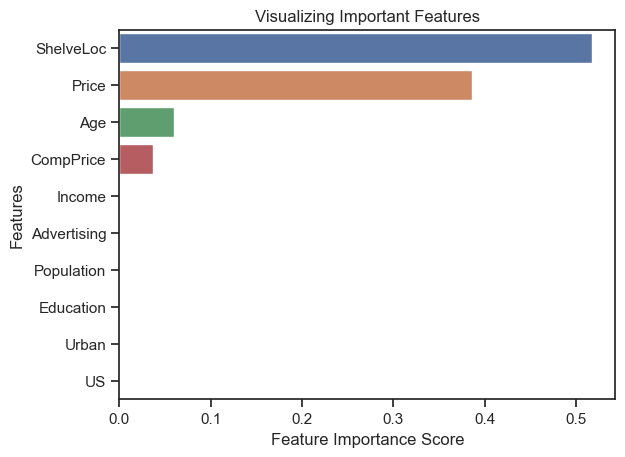

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [186]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

2    61
0    13
1     6
dtype: int64

In [187]:
preds

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [188]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
row_0,,,
0,4,0,3
1,0,1,13
2,9,5,45


In [189]:
# Accuracy 
np.mean(preds==y_test)

0.625

## Building Decision Tree Classifier (CART) using Gini Criteria

In [190]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [191]:
model_gini.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [193]:
#Prediction and computing the accuracy
pred=model.predict(X_test)
np.mean(preds==y_test) 

0.625

In [194]:
model.feature_importances_ 

array([0.0367906 , 0.        , 0.        , 0.        , 0.38567795,
       0.5172049 , 0.06032655, 0.        , 0.        , 0.        ])

## Decision Tree Regression Example

In [195]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [196]:
array = data.values
X = array[:,1:12] 
y = array[:,0] 

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [198]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(X_train, y_train)    

DecisionTreeRegressor(max_depth=3)

In [199]:
#Find the testing accuracy
model.score(X_test,y_test)

0.478405063404448

In [200]:
#Find the training accuracy
model.score(X_train, y_train)  

0.46592633019031826